<a href="https://colab.research.google.com/github/WilsonAmorim/Atendimento/blob/main/Calculo_de__Metricas_de_Avaliacao_de_Aprendizado_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

In [8]:
def calcular_metricas(vp, vn, fp, fn):
    total = vp + vn + fp + fn

    acuracia = (vp + vn) / total
    precisao = vp / (vp + fp) if (vp + fp) != 0 else 0
    recall = vp / (vp + fn) if (vp + fn) != 0 else 0
    especificidade = vn / (vn + fp) if (vn + fp) != 0 else 0
    f1_score = (2 * precisao * recall) / (precisao + recall) if (precisao + recall) != 0 else 0

    return {
        "Acurácia": round(acuracia, 4),
        "Precisão": round(precisao, 4),
        "Recall (Sensibilidade)": round(recall, 4),
        "Especificidade": round(especificidade, 4),
        "F1-Score": round(f1_score, 4),
    }



In [9]:
# Simula rótulos verdadeiros
y_true = np.array([1]*80 + [0]*120)

In [10]:
# Simula probabilidades preditas por um modelo
np.random.seed(42)
y_scores = np.concatenate([
    np.random.uniform(0.6, 1.0, 80),  # pontuação alta para positivos
    np.random.uniform(0.0, 0.4, 120)  # pontuação baixa para negativos
])

In [11]:
# Gera predições binárias com limiar 0.5
y_pred = (y_scores >= 0.5).astype(int)

In [12]:
# Calcula VP, VN, FP, FN
vp = np.sum((y_true == 1) & (y_pred == 1))
vn = np.sum((y_true == 0) & (y_pred == 0))
fp = np.sum((y_true == 0) & (y_pred == 1))
fn = np.sum((y_true == 1) & (y_pred == 0))

In [13]:
# Calcula e imprime as métricas
metricas = calcular_metricas(vp, vn, fp, fn)
for nome, valor in metricas.items():
    print(f"{nome}: {valor * 100:.2f}%")

Acurácia: 100.00%
Precisão: 100.00%
Recall (Sensibilidade): 100.00%
Especificidade: 100.00%
F1-Score: 100.00%


In [14]:
# Calcula curva ROC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

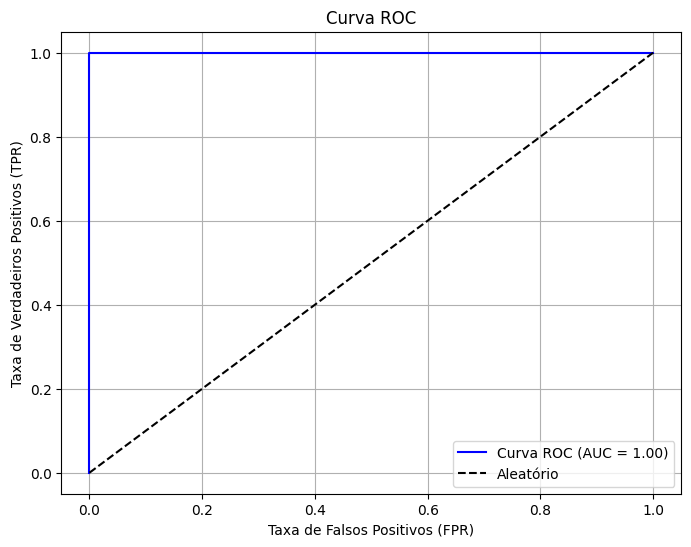

In [15]:
# Plota a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()